*Importing Libraries*

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

print('Libraries imported')

Libraries imported


##**COVID-19 pandemic data/India/Tamil Nadu medical cases by district**



In [3]:
url = "https://en.m.wikipedia.org/wiki/Template:COVID-19_pandemic_data/India/Tamil_Nadu_medical_cases_by_district"
source = requests.get(url).text
print('Done')

Done


**Extracting Table contents using BeautifulSoup!**

In [4]:
soup = BeautifulSoup(source,"html.parser")
table=soup.find('table')
#table

**Creating Columns for pandemic data**

In [5]:
column_names = ['District','Diagnosed cases','Deaths','Recovered cases','Active cases','Population','Cases per M','Last case reported on']
df = pd.DataFrame(columns = column_names)
df.columns

Index(['District', 'Diagnosed cases', 'Deaths', 'Recovered cases',
       'Active cases', 'Population', 'Cases per M', 'Last case reported on'],
      dtype='object')

**Retriving table Information from web**

In [6]:
for row_cell in table.find_all('tr'):
    row=[]
    for data_cell in row_cell.find_all('th'):
        row.append(data_cell.text.strip())
        for data_cell in row_cell.find_all('td'):
          row.append(data_cell.text.strip())
    if len(row)==8:
        df.loc[len(df)]=row

**Viewing Data Frame contents**

In [6]:
df.head()

,District,Diagnosed cases,Deaths,Recovered cases,Active cases,Population,Cases per M,Last case reported on
0,District,Diagnosed cases[a],Deaths,Recovered cases,Active cases[b],Population[1],Cases per M,Last case reported on
1,Tamil Nadu,"147,324","2,099","97,310","47,912","71,875,403","2,050",14 July 2020
2,Ariyalur,542,1,468,73,"754,894",718,14 July 2020
3,Chengalpattu,"8,553",169,"5,695","2,689","2,556,244","3,346",14 July 2020
4,Chennai,"79,662","1,295","62,552","15,815","4,646,732","17,144",14 July 2020


Data Cleaning- Removing unnecessary rows and comma's for numerical data

In [7]:
cases_dt = df.iloc[3:]
cases_dt=cases_dt.reset_index(drop=True)
cases_dt.head()

,District,Diagnosed cases,Deaths,Recovered cases,Active cases,Population,Cases per M,Last case reported on
0,Chengalpattu,"8,553",169,"5,695","2,689","2,556,244","3,346",14 July 2020
1,Chennai,"79,662","1,295","62,552","15,815","4,646,732","17,144",14 July 2020
2,Coimbatore,"1,480",10,338,"1,132","3,458,045",428,14 July 2020
3,Cuddalore,"1,565",6,"1,154",405,"2,605,914",601,14 July 2020
4,Dharmapuri,260,1,103,156,"1,506,843",173,14 July 2020


**Removing unwanted characters from numeric columns**

In [8]:
import re

In [9]:
#cases_dt.iloc[13, cases_dt.columns.get_loc('Population')] = str('1,614,069')
cases_dt['Diagnosed cases'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
cases_dt['Deaths'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
cases_dt['Recovered cases'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
cases_dt['Active cases'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
cases_dt['Population'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
cases_dt['Cases per M'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')

# **Convert required columns to number type**

In [10]:
import locale
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')


'en_US.UTF-8'

In [ ]:
cases_dt[['Diagnosed cases', 'Deaths', 'Recovered cases','Active cases', 'Population', 'Cases per M']].applymap(atof)

**Converting the Columns to INT**

In [12]:
cases_dt[['Diagnosed cases', 'Deaths', 'Recovered cases','Active cases', 'Population', 'Cases per M']] = cases_dt[['Diagnosed cases', 'Deaths', 'Recovered cases','Active cases', 'Population', 'Cases per M']].apply(pd.to_numeric) 
print(cases_dt.dtypes) 

District                 object
Diagnosed cases           int64
Deaths                    int64
Recovered cases           int64
Active cases              int64
Population                int64
Cases per M               int64
Last case reported on    object
dtype: object


In [13]:
cases_dt.head()

,District,Diagnosed cases,Deaths,Recovered cases,Active cases,Population,Cases per M,Last case reported on
0,Chengalpattu,8553,169,5695,2689,2556244,3346,14 July 2020
1,Chennai,79662,1295,62552,15815,4646732,17144,14 July 2020
2,Coimbatore,1480,10,338,1132,3458045,428,14 July 2020
3,Cuddalore,1565,6,1154,405,2605914,601,14 July 2020
4,Dharmapuri,260,1,103,156,1506843,173,14 July 2020


# **Bar Chart**

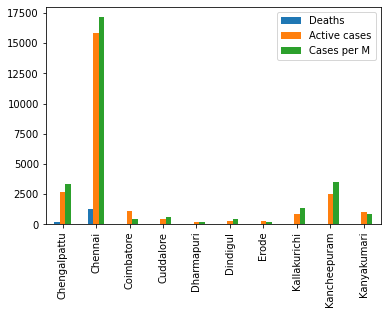

In [14]:
df = pd.DataFrame({'Deaths': cases_dt['Deaths'][:10].tolist(),'Active cases': cases_dt['Active cases'][:10].tolist(),'Cases per M': cases_dt['Cases per M'][:10].tolist()} , index=cases_dt['District'][:10].tolist())
df.head()
ax = df.plot.bar()

**Heat Map**

In [15]:
import seaborn as sns
from sklearn import preprocessing


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


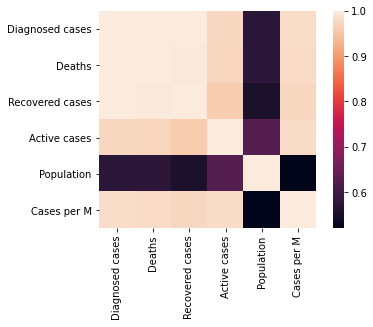

In [16]:
cases_heatmap=cases_dt[['Diagnosed cases', 'Deaths', 'Recovered cases','Active cases', 'Population', 'Cases per M']] #Subsetting the data
normalized_cases = preprocessing.normalize(cases_heatmap)
cor = cases_heatmap.corr() #Calculate the correlation of the above variables
cor.head()
sns.heatmap(cases_heatmap.corr(), square = True) #Plot the correlation as heat map
#cases_heatmap.head(40)

#normalized_cases

##**Latitude and Longitude Data of TN Districts**

In [17]:
from google.colab import files
files.upload()

Saving TN Lat Lon12.csv to TN Lat Lon12.csv


{'TN Lat Lon12.csv': b'Active,Location,Latitude,Longitude\r\n1,Ariyalur,11\xb0 8\' N,79\xb0 4\' E\r\n1,Chengalpattu,12\xb0 42\' N,80\xb0 01\' E\r\n1,Chennai,13\xb0 04\' N,80\xb0 17\' E\r\n1,Coimbatore,11\xb0 00\' N,77\xb0 00\' E\r\n1,Cuddalore,11\xb0 43\' N,79\xb0 49\' E\r\n1,Dharmapuri,12\xb0 08\' N,78\xb0 13\' E\r\n1,Dindigul,10\xb0 22\' N,78\xb0 00\' E\r\n1,Erode,11\xb0 20\' N,77\xb0 46\' E\r\n1,Kallakurichi,11\xb0 44\' N,78\xb0 57\' E\r\n1,Kancheepuram,12\xb0 50\' N,79\xb0 45\' E\r\n1,Kanyakumari,8\xb0 5\' N,77\xb0 32\' E\r\n1,Karur,10\xb0 58\' N,78\xb0 07\' E\r\n1,Krishnagiri,12\xb0 32\' N,78\xb0 16\' E\r\n1,Madurai,9\xb0 58\' N,78\xb0 10\' E\r\n1,Nagapattinam[c],10\xb0 50\' N,79\xb0 44\' E\r\n1,Namakkal,11\xb0 13 \' N,78\xb0 13\' E\r\n1,Nilgiris,11\xb0 29\' N,76\xb0 44\' E\r\n1,Perambalur,11\xb0 14\' N,78\xb0 56 \' E\r\n1,Pudukkottai,10\xb0 23\' N,78\xb0 52 \' E\r\n1,Ramanathapuram,9\xb0 22\' N,78\xb0 52 \' E\r\n1,Ranipet,12\xb0 55\' N,79\xb0 20\' E\r\n1,Salem,11\xb0 39\' N,78\xb

**Importing latitude and Longitude of TN Districts**

In [18]:
import pandas as pd
Lat_Long_TN = pd.read_csv('TN Lat Lon12.csv', encoding= 'unicode_escape')

View the TN dataset (Contains DMS coordinates)

In [19]:
Lat_Long_TN.head(100)

,Active,Location,Latitude,Longitude
0,1,Ariyalur,11° 8' N,79° 4' E
1,1,Chengalpattu,12° 42' N,80° 01' E
2,1,Chennai,13° 04' N,80° 17' E
3,1,Coimbatore,11° 00' N,77° 00' E
4,1,Cuddalore,11° 43' N,79° 49' E
...,...,...,...,...
95,0,Rajapalayam,9° 27' N,77° 36 ' E
96,0,Rameswaram,9° 17' N,79° 22 ' E
97,0,Sankaranayinarkovil,9° 1' N,77° 35 ' E
98,0,Sattur,9° 21' N,77° 58 ' E


**Convert DMS (degrees-minutes-seconds) to DD (decimal degrees) Coordinates**

In [20]:
import re

In [21]:
def dms2dd(degrees, minutes, direction):
    dd = float(degrees) + float(minutes)/60;
    if direction == 'S' or direction == 'W':
        dd *= -1
    return dd;

In [22]:
def parse_dms(lat,lon):
    lat_part = re.split('[^\d\w]+', lat)
    lon_part = re.split('[^\d\w]+', lon)
    
    lati = dms2dd(lat_part[0], lat_part[1], lat_part[2])
    lng = dms2dd(lon_part[0], lon_part[1], lon_part[2])
    return (lati,lng)

**Appending DD columns to the dataset**

In [23]:
DD_Lat=[]
DD_Lng=[]
for i in range(len(Lat_Long_TN)):
    #print(Lat_Long_TN.loc[i, 'Latitude'], Lat_Long_TN.loc[i, 'Longitude'])
    latt=parse_dms(Lat_Long_TN.loc[i, 'Latitude'], Lat_Long_TN.loc[i, 'Longitude'])
    DD_Lat.append(latt[0])
    DD_Lng.append(latt[1])

In [24]:
Lat_Long_TN['DD_Lat']=DD_Lat
Lat_Long_TN['DD_Lng']=DD_Lng

In [25]:
Lat_Long_TN.head()

,Active,Location,Latitude,Longitude,DD_Lat,DD_Lng
0,1,Ariyalur,11° 8' N,79° 4' E,11.133333,79.066667
1,1,Chengalpattu,12° 42' N,80° 01' E,12.700000,80.016667
2,1,Chennai,13° 04' N,80° 17' E,13.066667,80.283333
3,1,Coimbatore,11° 00' N,77° 00' E,11.000000,77.000000
4,1,Cuddalore,11° 43' N,79° 49' E,11.716667,79.816667


In [26]:
Lat_Long_TN.shape

(118, 6)

##**Problem 1: Finding Nearby Hospital Locations based on FourSquare API**

**FourSquare Credentials**

In [27]:
CLIENT_ID = 'WP3BIPKNJA0LQUKSCMNGUJRNGQASV1BB0M43R4LG234GTTJZ'# your Foursquare ID
CLIENT_SECRET = 'HCH3MN350XFRQXETVDGFAQKNVZTE1HGQ2PYRIO2UK20IB41S' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
CATEGORY_ID = '4bf58dd8d48988d196941735' # CATEGORY_ID for Fetching Hospital Locations

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('CATEGORY_ID:' + CATEGORY_ID)

Your credentails:
CLIENT_ID: WP3BIPKNJA0LQUKSCMNGUJRNGQASV1BB0M43R4LG234GTTJZ
CLIENT_SECRET:HCH3MN350XFRQXETVDGFAQKNVZTE1HGQ2PYRIO2UK20IB41S
CATEGORY_ID:4bf58dd8d48988d196941735


**Finding Hospital Locations over a particular area in Chennai District**

In [28]:
from geopy.geocoders import Nominatim

In [29]:
address = 'Alwarpet, Chennai, Tamilnadu'

geolocator1 = Nominatim(user_agent="ny_explorer")
location1 = geolocator1.geocode(address)
latitude1 = location1.latitude
longitude1 = location1.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude1, longitude1))

The geograpical coordinate of Alwarpet, Chennai, Tamilnadu are 13.0338602, 80.2545491.


**Setting radius to find hospitals within the radius (2000)**

In [30]:
LIMIT = 100
radius = 2000
url = 'https://api.foursquare.com/v2/venues/explore?&categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CATEGORY_ID,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude1, 
    longitude1, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&categoryId=4bf58dd8d48988d196941735&client_id=WP3BIPKNJA0LQUKSCMNGUJRNGQASV1BB0M43R4LG234GTTJZ&client_secret=HCH3MN350XFRQXETVDGFAQKNVZTE1HGQ2PYRIO2UK20IB41S&v=20180605&ll=13.0338602,80.2545491&radius=2000&limit=100'

**Extracting Nearby Hospitals**

In [31]:
import requests
import json
from pandas.io.json import json_normalize

In [32]:
results = requests.get(url).json()

In [33]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [34]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(100)

,name,categories,lat,lng
0,kauvery hospital,Hospital,13.038214,80.257067
1,Balaji Dental & Craniofacial Hospital,Dentist's Office,13.035352,80.247048
2,Apollo Speciality Hospital,Hospital,13.033841,80.245289
3,ALL SMYLES COSMETIC DENTAL CENTRE CHENNAI INDIA,Dentist's Office,13.033604,80.250548
4,SKS Veterinary Hospital,Hospital,13.028984,80.258728
5,Madras ENT Research Foundation,Hospital,13.027266,80.254176
6,St. Isabel's Hospital,Hospital,13.039236,80.262297
7,Oliva Skin and Hair Clinic Alwarpet,Hospital,13.042096,80.259281
8,Sankara Nethralaya,Hospital,13.026432,80.261102
9,Dr. Agarwal's Eye Hospital,Hospital,13.046304,80.255363


**Calculating Distance for the hospitals extracted**

In [35]:
from math import radians, cos, sin, asin, sqrt 
def distance(lat1, lon1, lat2, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return(c * r) 

In [36]:
Dist_km=[]
for i in range(len(nearby_venues)):
    #print(Lat_Long_TN.loc[i, 'Latitude'], Lat_Long_TN.loc[i, 'Longitude'])
    dist=distance(latitude1,longitude1,nearby_venues.loc[i, 'lat'], nearby_venues.loc[i, 'lng'])
    Dist_km.append(dist)

In [37]:
nearby_venues['Distance']=Dist_km

In [38]:
nearby_venues.head()

,name,categories,lat,lng,Distance
0,kauvery hospital,Hospital,13.038214,80.257067,0.555733
1,Balaji Dental & Craniofacial Hospital,Dentist's Office,13.035352,80.247048,0.829344
2,Apollo Speciality Hospital,Hospital,13.033841,80.245289,1.003141
3,ALL SMYLES COSMETIC DENTAL CENTRE CHENNAI INDIA,Dentist's Office,13.033604,80.250548,0.434329
4,SKS Veterinary Hospital,Hospital,13.028984,80.258728,0.706312


**Spotting the locations in the Map**

In [39]:
nearby_venues=nearby_venues.sort_values(by=['Distance'])

In [40]:
nearby_venues.head()

,name,categories,lat,lng,Distance
3,ALL SMYLES COSMETIC DENTAL CENTRE CHENNAI INDIA,Dentist's Office,13.033604,80.250548,0.434329
0,kauvery hospital,Hospital,13.038214,80.257067,0.555733
4,SKS Veterinary Hospital,Hospital,13.028984,80.258728,0.706312
5,Madras ENT Research Foundation,Hospital,13.027266,80.254176,0.734405
1,Balaji Dental & Craniofacial Hospital,Dentist's Office,13.035352,80.247048,0.829344


**Clustering based on distance**

In [41]:
from sklearn.cluster import KMeans

In [42]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_venues[['lat','lng','Distance']])

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2], dtype=int32)

In [43]:
nearby_venues.insert(0, 'Cluster Labels', kmeans.labels_)

In [45]:
nearby_venues.head(13)

,Cluster Labels,name,categories,lat,lng,Distance
3,0,ALL SMYLES COSMETIC DENTAL CENTRE CHENNAI INDIA,Dentist's Office,13.033604,80.250548,0.434329
0,0,kauvery hospital,Hospital,13.038214,80.257067,0.555733
4,0,SKS Veterinary Hospital,Hospital,13.028984,80.258728,0.706312
5,0,Madras ENT Research Foundation,Hospital,13.027266,80.254176,0.734405
1,0,Balaji Dental & Craniofacial Hospital,Dentist's Office,13.035352,80.247048,0.829344
2,2,Apollo Speciality Hospital,Hospital,13.033841,80.245289,1.003141
6,2,St. Isabel's Hospital,Hospital,13.039236,80.262297,1.030461
7,2,Oliva Skin and Hair Clinic Alwarpet,Hospital,13.042096,80.259281,1.049481
8,2,Sankara Nethralaya,Hospital,13.026432,80.261102,1.089126
9,2,Dr. Agarwal's Eye Hospital,Hospital,13.046304,80.255363,1.386506


**Mapping Clutered Coordinates**

In [46]:
import folium # map rendering library
import matplotlib.cm as cm
import numpy as np
import matplotlib.colors as colors

In [47]:
# create map
map_clusters = folium.Map(location=[latitude1, longitude1], zoom_start=13)

# set color scheme for the clusters
kclusters=3
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name, distt, clus in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'],nearby_venues['Distance'],nearby_venues['Cluster Labels']):
    label = folium.Popup(str(name) + '\n Distance:' + str(distt) + 'km', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[clus],
        fill=True,
        fill_color=rainbow[clus],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##**Problem 2: Clustering severity of COVID-19 impact based on FourSquare API**

Merging two dataframes containing locations and COVID-19 cases

In [48]:
Lat_Long_TN.head()

,Active,Location,Latitude,Longitude,DD_Lat,DD_Lng
0,1,Ariyalur,11° 8' N,79° 4' E,11.133333,79.066667
1,1,Chengalpattu,12° 42' N,80° 01' E,12.700000,80.016667
2,1,Chennai,13° 04' N,80° 17' E,13.066667,80.283333
3,1,Coimbatore,11° 00' N,77° 00' E,11.000000,77.000000
4,1,Cuddalore,11° 43' N,79° 49' E,11.716667,79.816667


In [49]:
cases_dt.head()

,District,Diagnosed cases,Deaths,Recovered cases,Active cases,Population,Cases per M,Last case reported on
0,Chengalpattu,8553,169,5695,2689,2556244,3346,14 July 2020
1,Chennai,79662,1295,62552,15815,4646732,17144,14 July 2020
2,Coimbatore,1480,10,338,1132,3458045,428,14 July 2020
3,Cuddalore,1565,6,1154,405,2605914,601,14 July 2020
4,Dharmapuri,260,1,103,156,1506843,173,14 July 2020


In [50]:
Merge_df=pd.merge(Lat_Long_TN, cases_dt, how='inner',left_on=['Location'],right_on=['District'])

In [51]:
Merge_df.head()

,Active,Location,Latitude,Longitude,DD_Lat,DD_Lng,District,Diagnosed cases,Deaths,Recovered cases,Active cases,Population,Cases per M,Last case reported on
0,1,Chengalpattu,12° 42' N,80° 01' E,12.700000,80.016667,Chengalpattu,8553,169,5695,2689,2556244,3346,14 July 2020
1,1,Chennai,13° 04' N,80° 17' E,13.066667,80.283333,Chennai,79662,1295,62552,15815,4646732,17144,14 July 2020
2,1,Coimbatore,11° 00' N,77° 00' E,11.000000,77.000000,Coimbatore,1480,10,338,1132,3458045,428,14 July 2020
3,1,Cuddalore,11° 43' N,79° 49' E,11.716667,79.816667,Cuddalore,1565,6,1154,405,2605914,601,14 July 2020
4,1,Dharmapuri,12° 08' N,78° 13' E,12.133333,78.216667,Dharmapuri,260,1,103,156,1506843,173,14 July 2020


** Clustering based on Diagnosed cases,	Deaths,	Recovered cases,Active cases,Population and	Cases per M Columns **

In [52]:
clus_dt=Merge_df[['Diagnosed cases','Deaths','Recovered cases','Active cases','Population','Cases per M']]
clus_dt.head()

,Diagnosed cases,Deaths,Recovered cases,Active cases,Population,Cases per M
0,8553,169,5695,2689,2556244,3346
1,79662,1295,62552,15815,4646732,17144
2,1480,10,338,1132,3458045,428
3,1565,6,1154,405,2605914,601
4,260,1,103,156,1506843,173


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot(x, y):
  plt.plot(x, y, 'o-')
  #plt.figure(figsize = (20,10))
  plt.xlabel("No. of clusters")
  plt.ylabel("Silhouette Score")
  plt.show()


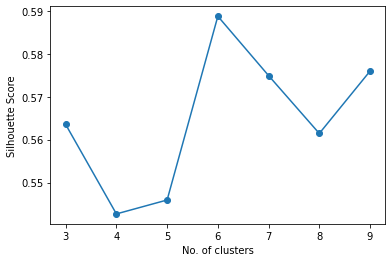

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score
indices = []
scores = []
for kclusters in range(3, 10) :
  kmeans = KMeans(n_clusters = kclusters, init = 'k-means++',random_state = 0).fit_predict(clus_dt)
  score = silhouette_score(clus_dt, kmeans)
  indices.append(kclusters)
  scores.append(score)
plot(indices, scores)
optimal_value = np.argmax(scores) + 2


In [55]:
from sklearn.cluster import KMeans

In [56]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Merge_df[['Diagnosed cases','Deaths','Recovered cases','Active cases','Population','Cases per M']])

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 4, 1, 3, 0, 3, 3, 2, 2, 0], dtype=int32)

In [57]:
Merge_df.insert(0, 'Cluster Labels', kmeans.labels_)

In [65]:
Merge_df=Merge_df.sort_values(by=['Cluster Labels'],ascending=False)
Merge_df.head(35)

,Cluster Labels,Active,Location,Latitude,Longitude,DD_Lat,DD_Lng,District,Diagnosed cases,Deaths,Recovered cases,Active cases,Population,Cases per M,Last case reported on
15,5,1,Nilgiris,11° 29' N,76° 44' E,11.483333,76.733333,Nilgiris,258,1,107,150,735394,351,14 July 2020
16,5,1,Perambalur,11° 14' N,78° 56 ' E,11.233333,78.933333,Perambalur,178,1,161,16,565223,315,14 July 2020
1,4,1,Chennai,13° 04' N,80° 17' E,13.066667,80.283333,Chennai,79662,1295,62552,15815,4646732,17144,14 July 2020
26,3,1,Tiruchirappalli,10° 50' N,78° 46' E,10.833333,78.766667,Tiruchirappalli,1715,27,964,724,2722290,630,14 July 2020
34,3,1,Villuppuram,11° 57' N,79° 32' E,11.950000,79.533333,Villuppuram,1723,20,1034,669,2093003,823,14 July 2020
23,3,1,Thanjavur,10° 47' N,79° 10' E,10.783333,79.166667,Thanjavur,738,11,422,1212,2405890,307,14 July 2020
3,3,1,Cuddalore,11° 43' N,79° 49' E,11.716667,79.816667,Cuddalore,1565,6,1154,405,2605914,601,14 July 2020
5,3,1,Dindigul,10° 22' N,78° 00' E,10.366667,78.000000,Dindigul,946,12,645,289,2159775,438,14 July 2020
29,3,1,Tiruppur,11° 05' N,77° 20' E,11.083333,77.333333,Tiruppur,319,4,185,130,2479052,129,14 July 2020
6,3,1,Erode,11° 20' N,77° 46' E,11.333333,77.766667,Erode,451,7,196,248,2251744,200,14 July 2020


**Clustering TN Districts based on COVID-19 Severity**

In [85]:
from geopy.geocoders import Nominatim

In [86]:
address = 'Tamilnadu, India'

geolocator1 = Nominatim(user_agent="ny_explorer")
location2 = geolocator1.geocode(address)
latitude2 = location1.latitude
longitude2 = location1.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude2, longitude2))

The geograpical coordinate of Tamilnadu, India are 13.0338602, 80.2545491.


In [87]:
import folium # map rendering library
import matplotlib.cm as cm
import numpy as np
import matplotlib.colors as colors

In [88]:
# create map
map_clusters = folium.Map(location=[latitude2, longitude2], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, Dt, Ac, Deaths, cluster in zip(Merge_df['DD_Lat'], Merge_df['DD_Lng'], Merge_df['District'],Merge_df['Active cases'],Merge_df['Deaths'], Merge_df['Cluster Labels']):
    label = folium.Popup(str(Dt) + '\n' + 'A. Cases: ' + str(Ac) + '\n' + 'Deaths: ' + str(Deaths), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters